In [25]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import os
import time
import subprocess
import sys

sys.path.append("..")
from main import Formula, WalkSat


In [26]:
%rm -rf ./experiment
%mkdir experiment

# Generate the experiments
for seed in range(5):
    os.popen(
        "python3 ./rnd-cnf-gen.py 10 20 3 %i > ./experiment/%i.cnf" % (seed, seed))


In [27]:
test_cases = os.listdir("experiment")
formulas = []
for case in test_cases:
    formulas.append(Formula("./experiment/"+case))
    
    

In [30]:
x_axis = range(50, 1000, 50)
y_axis = []

for flips in x_axis:
    clear_output()
    print(flips)
    
    sum = 0
    count = 0
    for formula in formulas:
        sat = WalkSat(formula, max_flips=flips)
        start = time.time()
        sol = sat.solve()
        end = time.time()
        
        
        if sol:
            sum += end-start
            count += 1
    y_axis.append(sum/count)
            

950


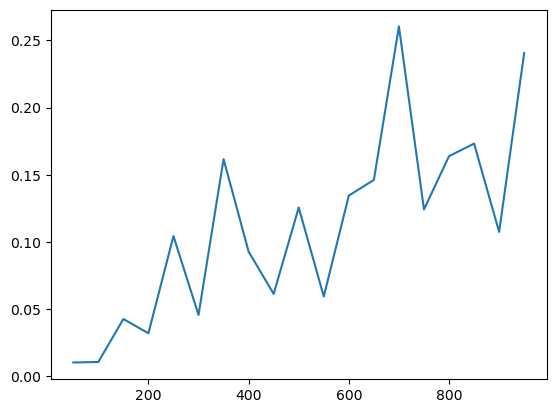

In [31]:
plt.plot(x_axis, y_axis)